In [1]:
from platform import python_version
print(python_version())

3.6.9


In [3]:
import importlib

#### Packages Needed

In [14]:
necessary_packages = ['PIL', 'requests', 'matplotlib']
for each_package in necessary_packages:
    is_necessary_packages_installed(each_package)

OK  PIL version 8.4.0
OK  requests version 2.26.0
OK  matplotlib version 3.3.4


In [9]:
%matplotlib inline

In [7]:
def is_necessary_packages_installed(pkg):
    try:
        mod = importlib.import_module(pkg)
        ver = mod.__version__
        print("OK ", '%s version %s' % (pkg, ver))
    except ImportError:
        print("FAIL ", '%s not installed. %s' % (pkg, fail_msg))

In [15]:
# Python 3 std libraries
import base64, io
# other libaries
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
# if you are under VPN, you can use Proxy
http_proxy  = "<your_proxy_url>"
https_proxy = "<your_proxy_url>"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            } 

In [204]:
def create_mermaid_graph(graph):
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    # when in VPN
    img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string, proxies=proxyDict).content))
    return img

### Project 1: Aspect-based Sentiment Analysis Pipeline

Sub-pipeline 1

In [173]:
Text2Embedding_graph = """graph LR
    A[(<br>Unlabelled Comments <br>in Database)]
    A ==> A2[[SparkPreprocessing+Embedding Pipeline]]
    style A fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style A2 fill:#FFFF99,stroke:#000000,stroke-width:4px
    A2 ==> F{{1. Preprocessed Sentences, <br> 2. Sentence Embeddings}}
    style F fill:#ADD8E6,stroke:#000000,stroke-width:4px
    subgraph SparkPreprocessing+Embedding Pipeline
        B(Spark Preprocessing)
        B --> |minimal <br>stop-words removal|C[Preprocessed Sentences]
        style B fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        B --> |custom <br>sentence segmentation|C
        style C fill:#ADD8E6,stroke:#000000,stroke-width:4px
        B --> |rejecting <br>usefless sentences|C
        C --> D(Transfer-learning <br>from pretrained <br>Universal Sentence Encoder Model)
        D --> E[Sentence <br> Embeddings]
        style D fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,color:#000000,stroke-dasharray: 3 3
        style E fill:#ADD8E6,stroke:#000000,stroke-width:4px
    end
"""

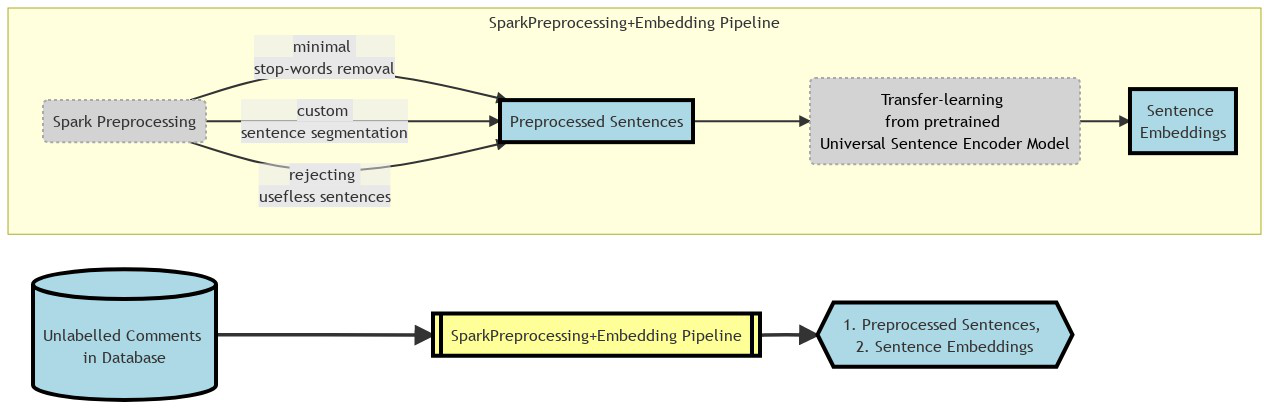

In [174]:
proj1_sub_pipeline1 = create_mermaid_graph(Text2Embedding_graph)
proj1_sub_pipeline1

In [175]:
proj1_sub_pipeline1.save('./images/proj1_spark_plus_embedding.png')

Sub-pipeline 2

In [163]:
clustering_graph ="""graph LR
    IP1{{1. Preprocessed Sentences}}
    IP2{{2. Sentence Embeddings}}
    IP1 --> temp[[Clustering_Pipeline]]
    IP2 --> temp
    temp --> OP{{K Clusters of Sentences}}
    style IP1 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style IP2 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style temp fill:#FFFF99,stroke:#000000,stroke-width:4px
    style OP fill:#ADD8E6,stroke:#000000,stroke-width:4px
    subgraph Clustering_Pipeline
        D(Spark KMeans Clustering) 
        D --> E[Clustered Sentences <br> into K groups]
        style D fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style E fill:#ADD8E6,stroke:#000000,stroke-width:4px
    end
    
"""

In [164]:
proj1_sub_pipeline2 = create_mermaid_graph(clustering_graph)

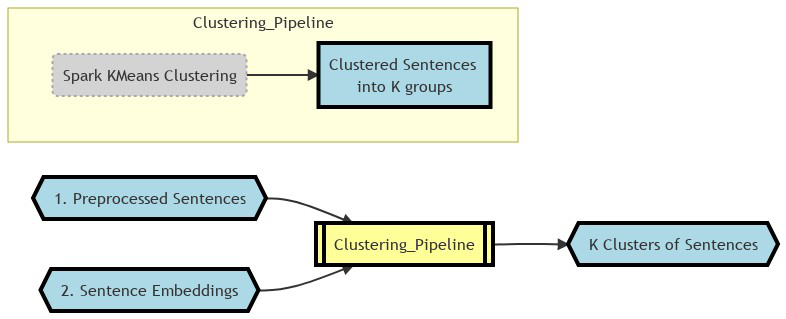

In [165]:
proj1_sub_pipeline2

Sub-pipeline 3

In [152]:
Efficient_Annotation_graph="""flowchart LR
    A[Clustered Sentences <br> into N groups]
    subgraph Efficient_Annotation_Pipeline
        EA1(Select easier sentences<br> closest to the centroid)
        EA2(Select confusing sentences<br> farthest from the centroid)
        EB1(Annotate <br>easier sentences first)
        EB1B(Standardize <br>the labeling process across annotators<br>Finalize Guidelines)
        EB2(Annotate <br>confusing sentences second)
        EA1 --> EB1 --> EB1B
        EA2 --> EB2
        EB1B --> EA2
        EB2 --> COUNT(Compute a Class-level Distribution of Annotated Sentences)
        COUNT --> M(Augment lower volume classes <br> through addition of <br> semantically similar sentences <br> from corpus)
    end
    A ==> Efficient_Annotation_Pipeline
    Efficient_Annotation_Pipeline ==> B(Human Annotation of <br>Sampled Sentences)
    style A fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style B fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
"""

In [153]:
proj1_sub_pipeline3 = create_mermaid_graph(Efficient_Annotation_graph)

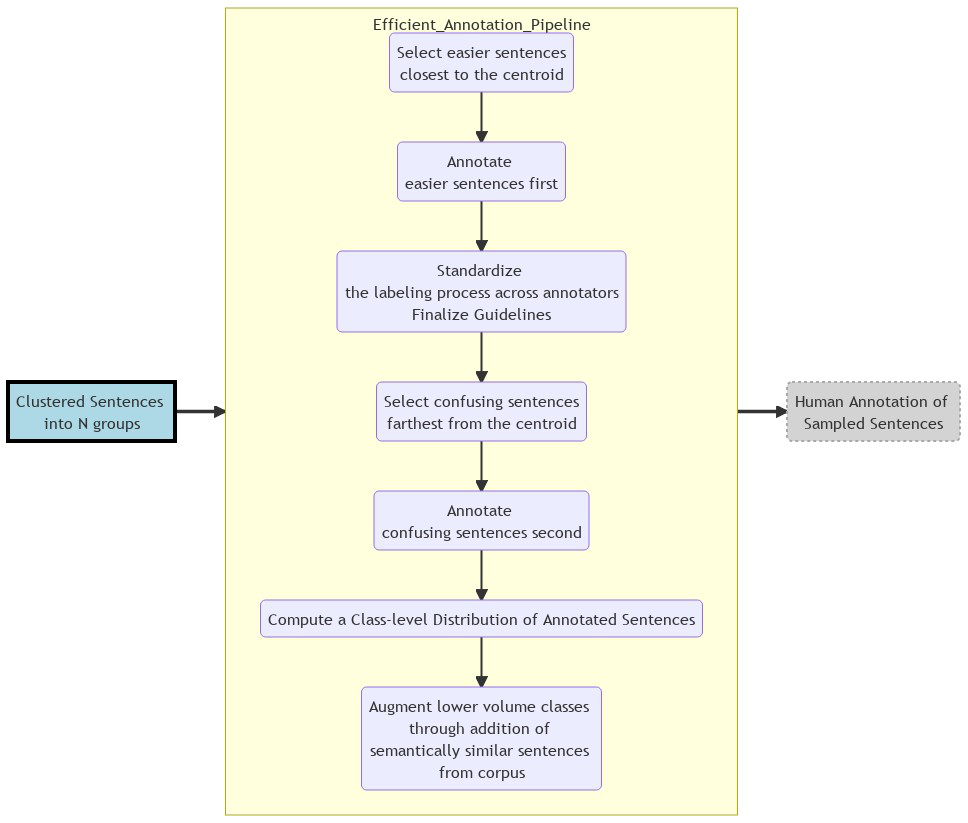

In [154]:
proj1_sub_pipeline3

In [155]:
proj1_sub_pipeline3.save('./images/proj1_annotation_pipeline.png')

In [176]:
ModelTraining_graph = """flowchart TD
    A[(<br>Unlabelled Comments <br>in Database)] --> B[[SparkPreprocessing+Embedding Pipeline*]]
    B --> C1{{Preprocessed Sentences}} & C2{{Sentence Embeddings}}
    style A fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style B fill:#FFFF99,stroke:#000000,stroke-width:4px
    style C1 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style C2 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    
    subgraph Spark_Clustering
        D(Spark KMeans Clustering) 
        D --> E[Clustered Sentences <br> into K groups]
        style D fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style E fill:#ADD8E6,stroke:#000000,stroke-width:4px
    end
    
    subgraph Model_Training_Pipeline
        H(Stratified K-Fold Split)
        H --> I[K-sets of non-overlapping <br> Train-Dev-Test]
        style H fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style I fill:#ADD8E6,stroke:#000000,stroke-width:4px
        
        I --> J(Model Training:<br>Uncased BERT Base Fine-tuned<br>Averaging class-level F1_score of K-models)
        J --> K{Is <br>class-level F1_score <br>above a satisfactory threshold?}   
        K --> |No|M(Augment poorly performing classes <br> through addition of <br> semantically similar sentences <br> from corpus)
        
        style J fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style K fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style M fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    end
    
    C1 & C2 ==If Training/Retraining Models==> Spark_Clustering
    Spark_Clustering ==> F[[Efficient_Annotation_Pipeline*]]
    F --> G[Human Annotated Sentences]
    style F fill:#FFFF99,stroke:#000000,stroke-width:4px
    style G fill:#ADD8E6,stroke:#000000,stroke-width:4px
    
    G --> H
    M --> G
    K --> |Yes|L{{Sentences, <br>Aspect Class, <br>Sentiment Class, <br> Model-confidence Probs}}
    L -.-> |Select <br> random predictions and <br>low confidence predictions| N(Periodical <br>Human Monitoring <br>of Model Results)
    N --> |Add corrected labeled to data<br>after periodical review|G
    style L fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style M fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    style N fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    C1 --> O(Run Inference <br> of Trained Models <br> on Preprocessed Sentences)
    O --> L
    style O fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
"""

In [177]:
proj1_full_pipeline = create_mermaid_graph(ModelTraining_graph)

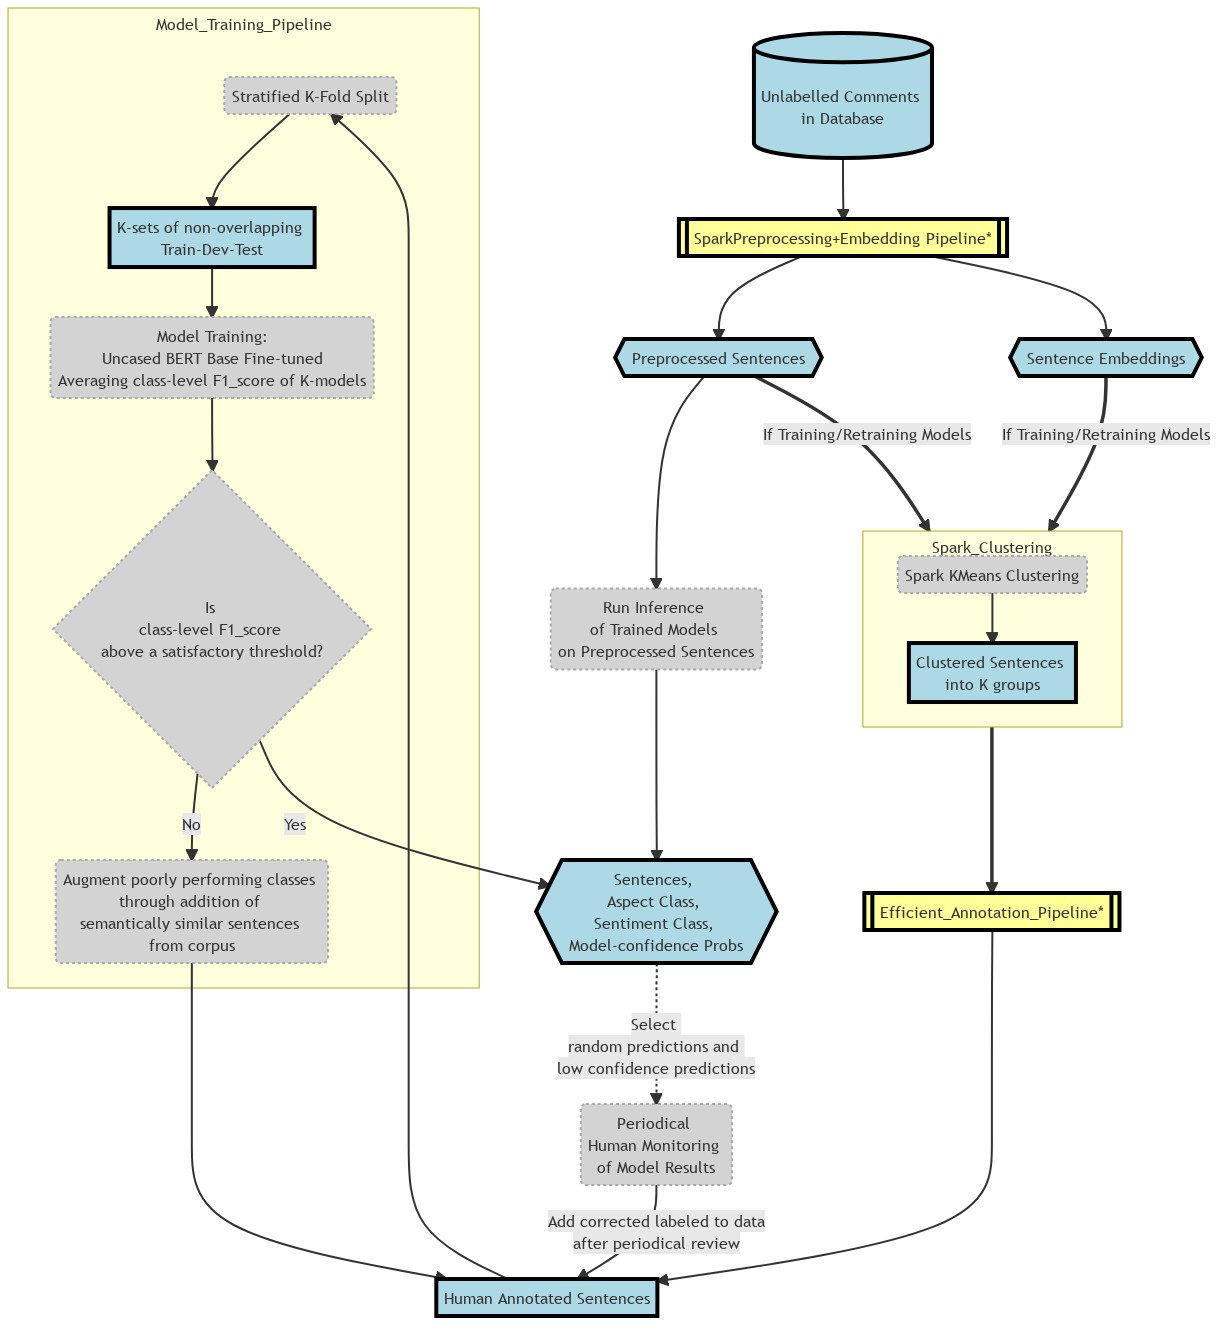

In [178]:
proj1_full_pipeline

In [180]:
proj1_full_pipeline.save('./images/proj1_full_pipeline.png')

### Project 2: Personally Identifiable Information Detection using Named Entity Recognition

In [194]:
pii_detection_graph="""flowchart TD
    A[(Unlabeled Data in<br>Database)] --> B1(Run SpaCy Rules NER)
    B2[Spacy Rules Patterns in JSON files] --> B1
    style A fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style B1 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    style B2 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    B1 --> C{{Rules <br> bootstrapped data}}
    style C fill:#ADD8E6,stroke:#000000,stroke-width:4px
    C --> D{Are <br>rules patterns enough?} 
    style D fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    D --> |Yes|SP1[[Rules_based_NER_Subpipeline]]
    SP1 --> rules3[Rules-based - Token_level NER Output]
    style SP1 fill:#FFFF99,stroke:#000000,stroke-width:4px
    style rules3 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    D --> |No|SP2[[Model_NER_Subpipeline]]
    SP2 --> submodel6[Model-based - Token_level NER Output]
    style SP2 fill:#FFFF99,stroke:#000000,stroke-width:4px
    style submodel6 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    rules3 & submodel6 -.-> G(OPTIONAL:<br>Correct model predictions or<br>rules outputs<br> with additional SpaCy Rules-based<br> Custom Pipeline Component)
    style G fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
    G --> I{{PII-Masked Content}}
    G --> J{{NER Entities Metadata}}
    style I fill:#ADD8E6,stroke:#000000,stroke-width:4px
    style J fill:#ADD8E6,stroke:#000000,stroke-width:4px
    """

In [195]:
proj2_custom_PII_main_pipeline = create_mermaid_graph(pii_detection_graph)

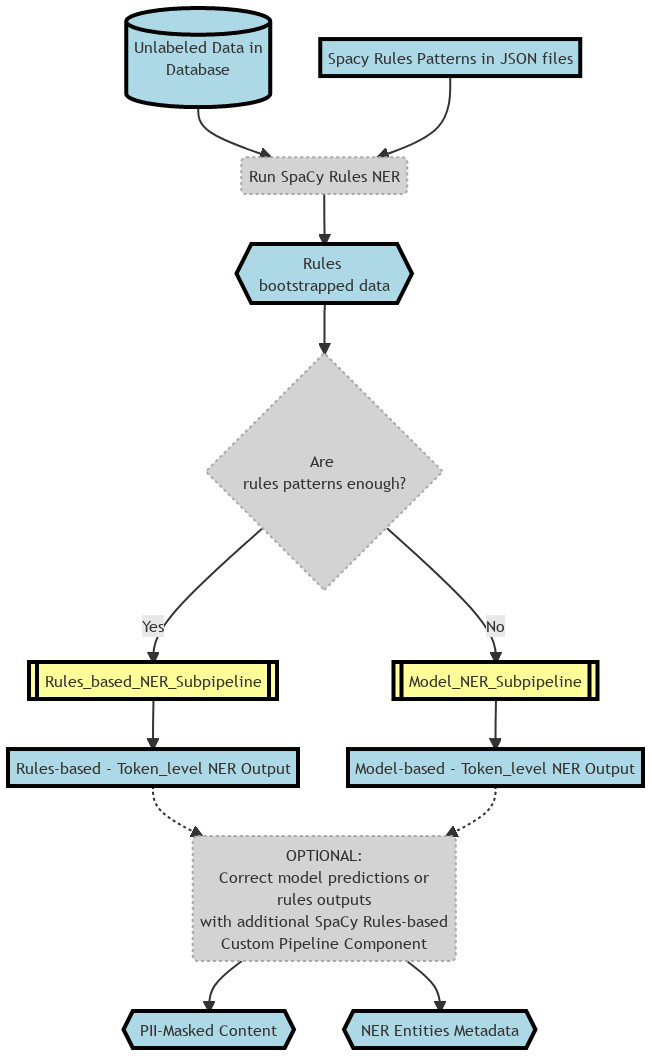

In [196]:
proj2_custom_PII_main_pipeline

In [198]:
proj2_custom_PII_main_pipeline.save('./images/proj2_pii_ner_main_pipeline.png')

Sub-pipeline 1

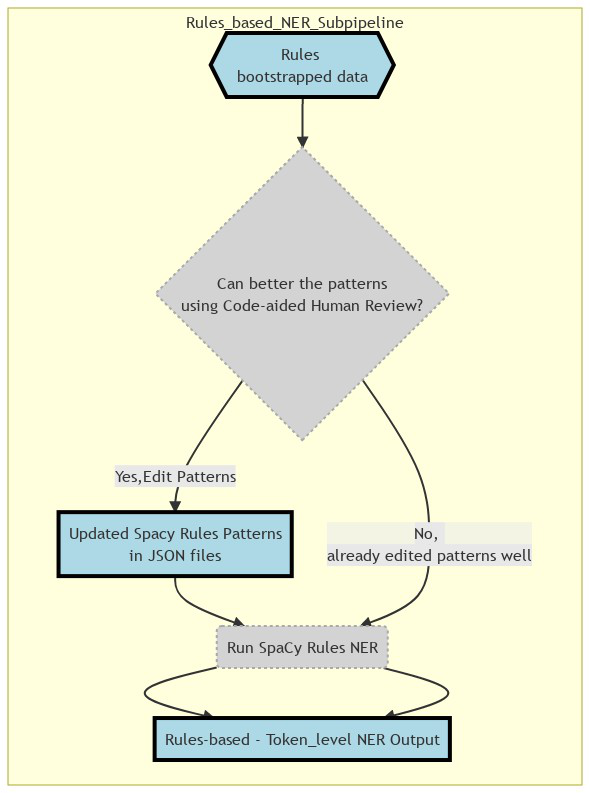

In [217]:
rules_based_NER_subpipeline = """graph TD
    subgraph Rules_based_NER_Subpipeline
        C{{Rules <br> bootstrapped data}}
        rules1{Can better the patterns<br>using Code-aided Human Review?}
        C --> rules1
        rules1 --> |Yes,Edit Patterns|rules2[Updated Spacy Rules Patterns<br>in JSON files]
        intermediary_rules_ner(Run SpaCy Rules NER)
        rules2 --> intermediary_rules_ner --> rules3[Rules-based - Token_level NER Output]
        rules1 --> |No, <br>already edited patterns well|intermediary_rules_ner --> rules3
        style C fill:#ADD8E6,stroke:#000000,stroke-width:4px
        style rules1 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style intermediary_rules_ner fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style rules2 fill:#ADD8E6,stroke:#000000,stroke-width:4px
        style rules3 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    end
    """

proj2_PII_subpipeline_1 = create_mermaid_graph(rules_based_NER_subpipeline)

proj2_PII_subpipeline_1

In [218]:
proj2_PII_subpipeline_1.save('./images/proj2_pii_nersub_pipeline1.png')

Sub-pipeline 2

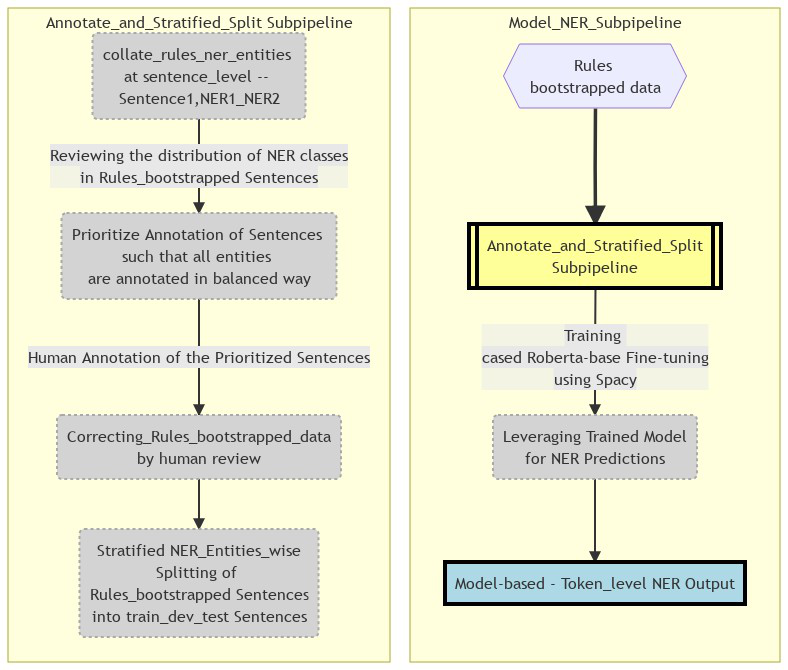

In [226]:
model_based_NER_subpipeline = """graph TD
    subgraph Model_NER_Subpipeline
        C{{Rules <br> bootstrapped data}}
        C ==> SSP[[Annotate_and_Stratified_Split<br>Subpipeline]]
        SSP --> |Training <br>cased Roberta-base Fine-tuning<br>using Spacy|submodel5(Leveraging Trained Model<br>for NER Predictions)
        submodel5 --> submodel6[Model-based - Token_level NER Output]
        style SSP fill:#FFFF99,stroke:#000000,stroke-width:4px
        style submodel5 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
        style submodel6 fill:#ADD8E6,stroke:#000000,stroke-width:4px
    end 
	subgraph Annotate_and_Stratified_Split Subpipeline
		submodel1(collate_rules_ner_entities <br> at sentence_level -- <br>Sentence1,NER1_NER2)
		submodel1 --> |Reviewing the distribution of NER classes<br> in Rules_bootstrapped Sentences|submodel2(Prioritize Annotation of Sentences <br> such that all entities <br> are annotated in balanced way)
		submodel2 --> |Human Annotation of the Prioritized Sentences|submodel3(Correcting_Rules_bootstrapped_data<br>by human review) 
		submodel3 --> submodel4(Stratified NER_Entities_wise<br>Splitting of <br> Rules_bootstrapped Sentences<br>into train_dev_test Sentences)
		style submodel1 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
		style submodel2 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
		style submodel3 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
		style submodel4 fill:#D3D3D3,stroke:#A9A9A9,stroke-width:2px,stroke-dasharray: 3 3
	end
    
    """

proj2_PII_subpipeline_2 = create_mermaid_graph(model_based_NER_subpipeline)

proj2_PII_subpipeline_2

In [227]:
proj2_PII_subpipeline_1.save('./images/proj2_pii_nersub_pipeline2.png')